Import necessary packages

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import seaborn as sns

Import data

In [ ]:
url  = 'https://github.com/ogunjosam/CARNASRDA_python_training/raw/main/osogbo.csv'

# we select column and set index columns
xx = pd.read_csv(url,index_col='created_at',usecols=[0,2,3,4,7,8],parse_dates=True)
xx['PM1.0_CF1_ug/m3'][xx['PM1.0_CF1_ug/m3'] > 300] = np.nan
xx['PM2.5_CF1_ug/m3'][xx['PM2.5_CF1_ug/m3'] > 300] = np.nan
xx['PM10.0_CF1_ug/m3'][xx['PM10.0_CF1_ug/m3'] > 300] = np.nan
xx = xx.resample('H').mean()
xx = xx.dropna(how='any')

Correlation and regression analysis

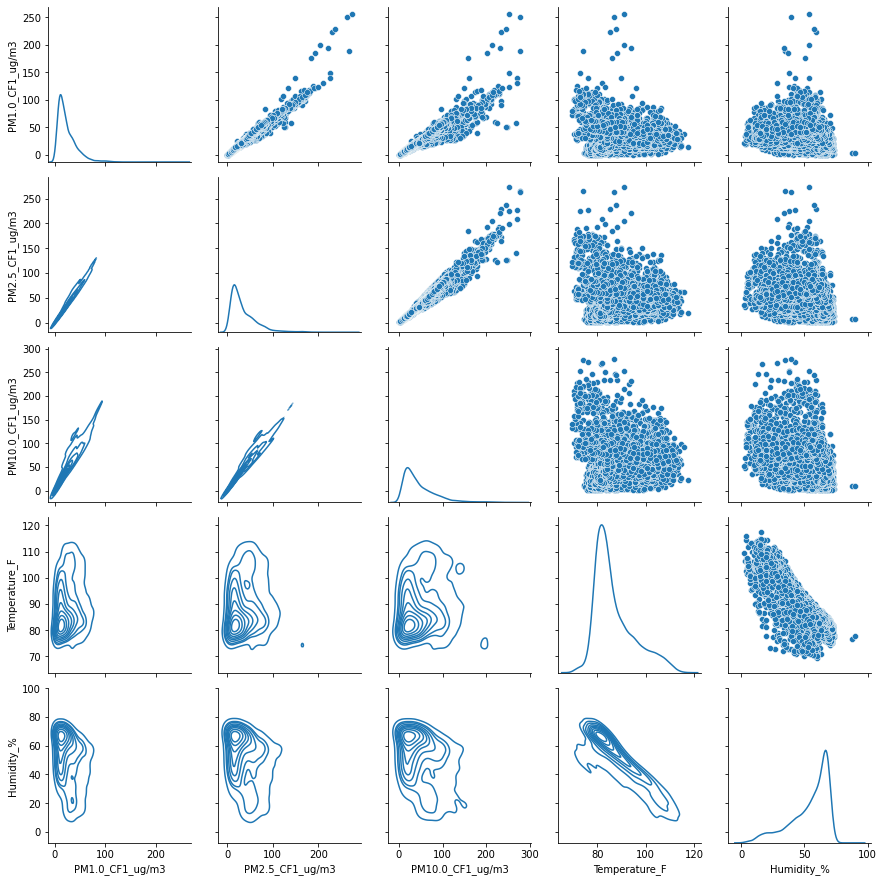

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%
created_at,,,,,
2021-01-01 00:00:00+00:00,47.902000,72.259000,82.220000,78.000000,59.166667
2021-01-01 01:00:00+00:00,53.006333,86.183667,110.456667,79.166667,62.433333
2021-01-01 02:00:00+00:00,53.058000,88.314667,114.411667,80.366667,62.900000
2021-01-01 03:00:00+00:00,51.493667,81.587333,99.405667,80.400000,63.800000
2021-01-01 04:00:00+00:00,53.252667,82.738000,97.372333,81.900000,63.833333
...,...,...,...,...,...
2021-12-31 19:00:00+00:00,50.453103,68.777241,87.038966,87.482759,46.551724
2021-12-31 20:00:00+00:00,59.513333,81.695333,101.067000,85.466667,49.966667
2021-12-31 21:00:00+00:00,57.508214,78.576786,97.284643,84.107143,52.428571


In [ ]:
#g = sns.PairGrid(xx,corner=True)
g = sns.PairGrid(xx)
#g.map(sns.scatterplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
plt.show()

xx

In [ ]:
from scipy import stats

xz = stats.linregress(xx['PM1.0_CF1_ug/m3'],xx['Temperature_F'])
xz
slope,intercept,rvalue,pvalue,std = stats.linregress(xx['PM1.0_CF1_ug/m3'],xx['Temperature_F'])
slope,intercept,rvalue,pvalue,std

(0.026964746698787487,
 86.38122681725127,
 0.06337243285728071,
 1.4059311546159828e-08,
 0.004748523413023923)